In [1]:
#Import libraries


import random
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import squidpy as sq
from pathlib import Path

random.seed(10)

Global seed set to 0
/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [6]:
os.chdir('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/')

In [4]:
#Check Both SCVI and Harmony

In [2]:
adata_scv = sc.read_h5ad('astro_SCVI.h5ad')
adata_har = sc.read_h5ad('astro_harmony.h5ad')

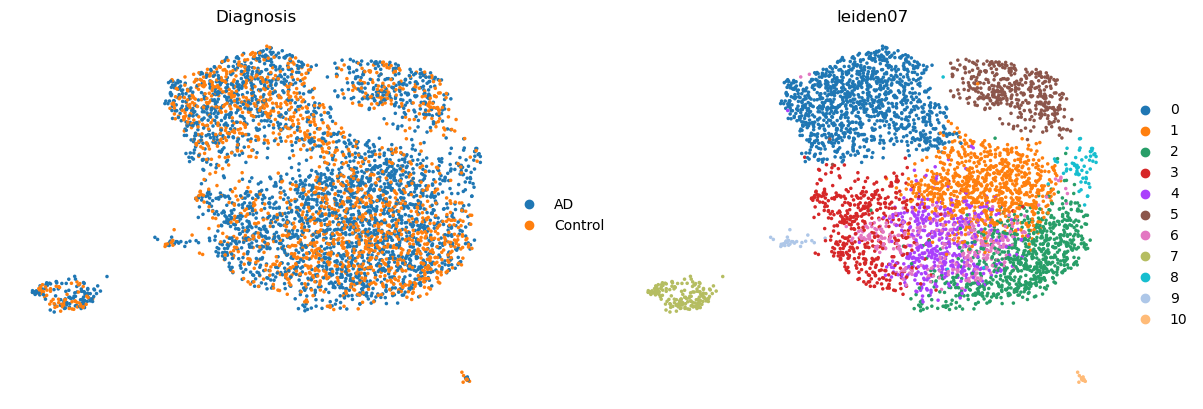

In [3]:
sc.pl.umap(
    adata_scv,
    color=["Diagnosis", "leiden07"],
    ncols=2,
    frameon=False,
)

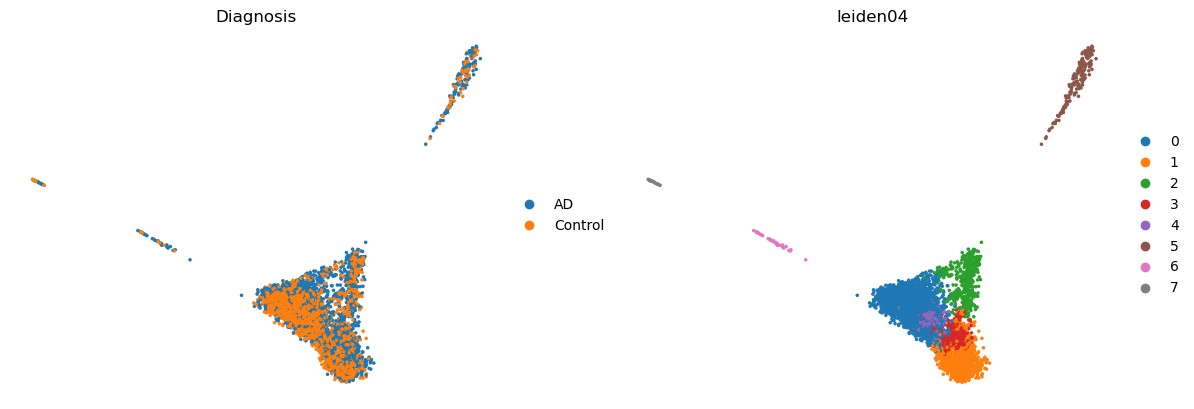

In [4]:
sc.pl.umap(
    adata_har,
    color=["Diagnosis", "leiden04"],
    ncols=2,
    frameon=False,
)

In [61]:
allen = pd.read_csv('trimmed_means.csv')
allen

feature  Inh L1 PAX6 CHRFAM7A  Inh L1-3 VIP CBLN1  \
0        DDX11L1              0.000000            0.000000   
1         WASH7P              0.000000            0.000000   
2      MIR6859-1              0.000000            0.000000   
3      MIR1302-2              0.000000            0.000000   
4        FAM138A              0.000000            0.000000   
...          ...                   ...                 ...   
50276        ND6              0.000000            0.000000   
50277       TRNE              0.000000            0.000000   
50278       CYTB              7.933085            7.970388   
50279       TRNT              0.000000            0.000000   
50280       TRNP              0.000000            0.000000   

       Exc L3 LAMP5 CARM1P1  Inh L1-3 SST FAM20A  Inh L1-6 LAMP5 AARD  \
0                  0.000000             0.000000                 0.00   
1                  0.000000             0.000000                 0.00   
2                  0.000000             0.000000                 0.00   
3                  0.000000             0.000000                 0.00   
4                  0.000000             0.000000                 0.00   
...                     ...                  ...                  ...   
50276              0.000000             0.000000                 0.00   
50277              0.000000             0.000000                 0.00   
50278              6.902729             4.809813                 7.77   
50279              0.000000             0.000000                 0.00   
50280              0.000000             0.000000                 0.00   

       Inh L1-6 LAMP5 CA1  Exc L6 THEMIS SLN  Inh L2 VIP SLC6A16  \
0                0.000000           0.000000            0.000000   
1                0.000000           0.000000            0.000000   
2                0.000000           0.000000            0.000000   
3                0.000000           0.000000            0.000000   
4                0.000000           0.000000            0.000000   
...                   ...                ...                 ...   
50276            0.000000           0.000000            0.000000   
50277            0.000000           0.000000            0.000000   
50278            8.231889           8.107318            8.358125   
50279            0.000000           0.000000            0.000000   
50280            0.000000           0.000000            0.000000   

       Exc L5 FEZF2 NREP-AS1  ...  Exc L5-6 FEZF2 SH2D1B  \
0                   0.000000  ...                0.00000   
1                   0.000000  ...                0.00000   
2                   0.000000  ...                0.00000   
3                   0.000000  ...                0.00000   
4                   0.000000  ...                0.00000   
...                      ...  ...                    ...   
50276               0.000000  ...                0.00000   
50277               0.000000  ...                0.00000   
50278               6.661652  ...                8.02475   
50279               0.000000  ...                0.00000   
50280               0.000000  ...                0.00000   

       Inh L2-5 PVALB RPH3AL  Exc L3 THEMIS ENPEP  Exc L6 FEZF2 PROKR2  \
0                   0.000000             0.000000             0.000000   
1                   0.000000             0.000000             0.000000   
2                   0.000000             0.000000             0.000000   
3                   0.000000             0.000000             0.000000   
4                   0.000000             0.000000             0.000000   
...                      ...                  ...                  ...   
50276               0.000000             0.000000             0.000000   
50277               0.000000             0.000000             0.000000   
50278               7.360882             7.292937             9.727838   
50279               0.000000             0.000000             0.000000   
50280               0.000000       

In [ ]:
#reorder allen brain 
allen = allen.reindex(sorted(allen.columns), axis=1)

In [62]:
filter_oligo = [col for col in allen if 'Oligo' in col]
filtered_oligo = allen[['feature', 'Oligo L2-6 OPALIN FTH1P3',
 'Oligo L2-6 OPALIN MAP6D1',
 'Oligo L3-6 OPALIN ENPP6',
 'Oligo L5-6 OPALIN LDLRAP1']]

In [64]:
#I chose the max expressed value and put it in the final column. lol
maxvalue = filtered_oligo.max(axis=1)

/tmp/ipykernel_9556/3175314035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filtered_oligo.max(axis=1)


In [65]:
filtered_oligo['Oligo'] = maxvalue

/tmp/ipykernel_9556/3699846141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_oligo['Oligo'] = maxvalue


In [66]:
filtered_oligo

feature  Oligo L2-6 OPALIN FTH1P3  Oligo L2-6 OPALIN MAP6D1  \
0        DDX11L1                  0.000000                  0.000000   
1         WASH7P                  0.000000                  0.000000   
2      MIR6859-1                  0.000000                  0.000000   
3      MIR1302-2                  0.000000                  0.000000   
4        FAM138A                  0.000000                  0.000000   
...          ...                       ...                       ...   
50276        ND6                  0.000000                  0.000000   
50277       TRNE                  0.000000                  0.000000   
50278       CYTB                  1.250261                  6.695962   
50279       TRNT                  0.000000                  0.000000   
50280       TRNP                  0.000000                  0.000000   

       Oligo L3-6 OPALIN ENPP6  Oligo L5-6 OPALIN LDLRAP1     Oligo  
0                     0.000000                   0.000000  0.000000  
1                     0.000000                   0.000000  0.000000  
2                     0.000000                   0.000000  0.000000  
3                     0.000000                   0.000000  0.000000  
4                     0.000000                   0.000000  0.000000  
...                        ...                        ...       ...  
50276                 0.000000                   0.000000  0.000000  
50277                 0.000000                   0.000000  0.000000  
50278                 1.055786                   8.173333  8.173333  
50279                 0.000000                   0.000000  0.000000  
50280                 0.000000                   0.000000  0.000000  

[50281 rows x 6 columns]

In [ ]:
#We will do left join with harmony first

In [76]:
genes_oligo = adata_har.var[[]]
genes_oligo

Empty DataFrame
Columns: []
Index: [MTND2P28, MTATP6P1, SAMD11, HES4, LINC01770, ATAD3C, FNDC10, GABRD, HES5, AL139246.5, LINC00982, PRDM16, NPHP4, CHD5, AL031847.2, GPR153, TNFRSF25, TAS1R1, TNFRSF9, AL034417.2, SLC2A5, MIR34AHG, SLC25A33, PIK3CD, NMNAT1, PEX14, CASZ1, ANGPTL7, DHRS3, KAZN, TMEM51, AL450998.2, HSPB7, ARHGEF10L, LINC01654, IGSF21, MINOS1, NBL1, LINC01141, PINK1, C1QA, C1QC, EPHB2, LUZP1, TCEA3, ASAP3, AL451000.1, NCMAP, RHCE, MAN1C1, AL020996.2, EXTL1, TRIM63, AL034380.1, TRNP1, MAP3K6, AL513497.1, TAF12, GMEB1, EPB41, MATN1, LAPTM5, NKAIN1, SPOCD1, AL662907.3, CSMD2, DLGAP3, NCDN, CLSPN, CSF3R, GRIK3, CDCA8, AL139158.2, RRAGC, HEYL, HPCAL4, AL033527.3, RIMS3, SCMH1, HIVEP3, RIMKLA, CCDC30, TMEM269, AL139289.1, AL139220.2, ARMH1, EIF2B3, ZSWIM5, TESK2, MAST2, AL358075.4, MKNK1, TRABD2B, SKINT1L, AL109659.1, AL356968.2, AGBL4, AC099788.1, ELAVL4, LINC01562, ...]

[5000 rows x 0 columns]

In [82]:
#Adding the oligo expression to anndata harmony

adata_har.obs['Oligo test'] = genes_oligo.reset_index(level=0).merge(filtered_oligo, left_on = 'index', right_on='feature', how='left')['Oligo']

In [84]:
#Was dumb idea, have to try something else
adata_har.obs.drop('Oligo test', inplace=True, axis=1)

In [92]:
filtered_oligo

feature  Oligo L2-6 OPALIN FTH1P3  Oligo L2-6 OPALIN MAP6D1  \
0        DDX11L1                  0.000000                  0.000000   
1         WASH7P                  0.000000                  0.000000   
2      MIR6859-1                  0.000000                  0.000000   
3      MIR1302-2                  0.000000                  0.000000   
4        FAM138A                  0.000000                  0.000000   
...          ...                       ...                       ...   
50276        ND6                  0.000000                  0.000000   
50277       TRNE                  0.000000                  0.000000   
50278       CYTB                  1.250261                  6.695962   
50279       TRNT                  0.000000                  0.000000   
50280       TRNP                  0.000000                  0.000000   

       Oligo L3-6 OPALIN ENPP6  Oligo L5-6 OPALIN LDLRAP1     Oligo  
0                     0.000000                   0.000000  0.000000  
1                     0.000000                   0.000000  0.000000  
2                     0.000000                   0.000000  0.000000  
3                     0.000000                   0.000000  0.000000  
4                     0.000000                   0.000000  0.000000  
...                        ...                        ...       ...  
50276                 0.000000                   0.000000  0.000000  
50277                 0.000000                   0.000000  0.000000  
50278                 1.055786                   8.173333  8.173333  
50279                 0.000000                   0.000000  0.000000  
50280                 0.000000                   0.000000  0.000000  

[50281 rows x 6 columns]

In [100]:
filtered_oligo.drop(['Oligo L2-6 OPALIN FTH1P3',
 'Oligo L2-6 OPALIN MAP6D1',
 'Oligo L3-6 OPALIN ENPP6',
 'Oligo L5-6 OPALIN LDLRAP1'], inplace=False, axis=1).loc[filtered_oligo['Oligo'] > 0].sort_values("Oligo", ascending = False)['feature'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/oligo.csv', index=False)

28624          MALAT1
33053           PCDH9
11424          KCNIP4
48101        IL1RAPL1
9475            CADM2
             ...     
25706          RASSF4
27716         HTATIP2
43463             HPN
7268            HOXD1
20632    LOC105375544
Name: feature, Length: 7644, dtype: object

In [110]:
oligo = pd.read_csv('oligo.csv')
oligo

feature
0           MALAT1
1            PCDH9
2           KCNIP4
3         IL1RAPL1
4            CADM2
...            ...
7639        RASSF4
7640       HTATIP2
7641           HPN
7642         HOXD1
7643  LOC105375544

[7644 rows x 1 columns]

In [112]:
oligo.rename(columns = {'feature':'Oligo MG'}, inplace = True)

In [115]:
#We have to put them into the dictionary in order to get ranked

oligo_dict = oligo.to_dict('list')

In [116]:
#Marker gene overlap ? useless

marker_matches = sc.tl.marker_gene_overlap(adata_har, oligo_dict)
marker_matches

F     M
Oligo MG  73.0  75.0

In [124]:
oligo

Oligo MG
0           MALAT1
1            PCDH9
2           KCNIP4
3         IL1RAPL1
4            CADM2
...            ...
7639        RASSF4
7640       HTATIP2
7641           HPN
7642         HOXD1
7643  LOC105375544

[7644 rows x 1 columns]

In [142]:
sc.tl.score_genes(adata_har, oligo['Oligo MG'], score_name='Oligo MG')
sc.tl.score_genes(adata_scv, oligo['Oligo MG'], score_name='Oligo MG')

/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [126]:
#Check if added 

adata_har

AnnData object with n_obs × n_vars = 36957 × 5000
    obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'leiden1', 'leiden05', 'leiden01', 'leiden04', 'dpt_pseudotime', 'Oligo MG'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Diagnosis_colors', 'Sex_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'leiden', 'leiden01_colors', 'leiden04_colors', 'leiden04_sizes', 'leiden05_colors', 'leiden1_colors', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


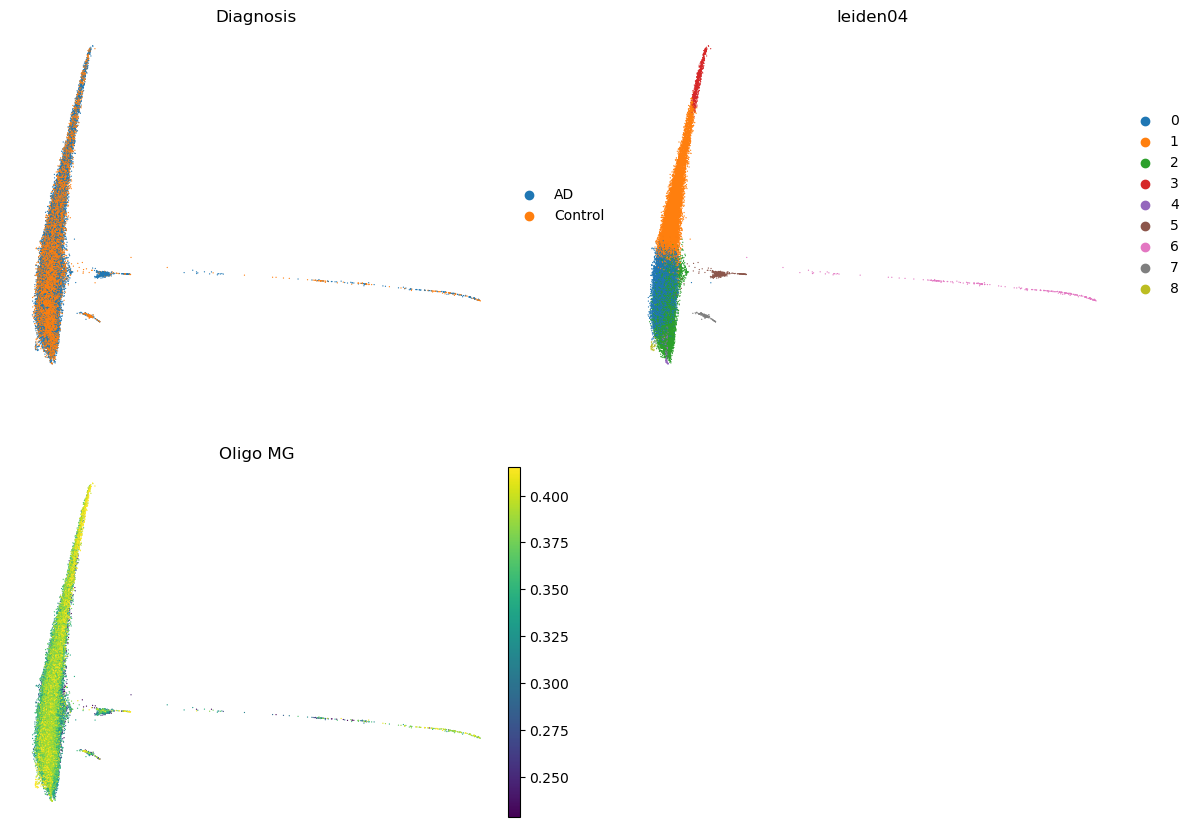

In [145]:
#Now check UMAP

sc.pl.umap(
    adata_har,
    color=["Diagnosis", "leiden04", 'Oligo MG'],
    ncols=2,
    frameon=False,
    vmin = 'p1.5', vmax = 'p99'
)

/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


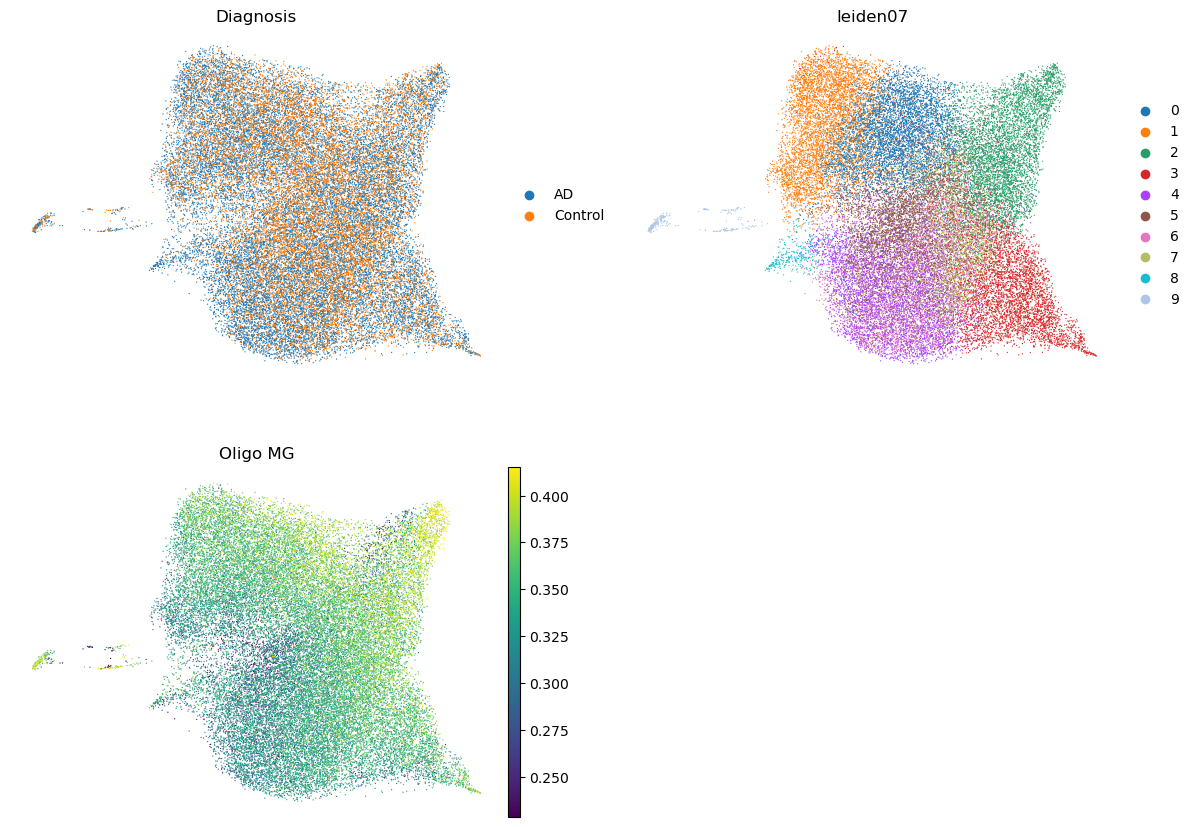

In [144]:
#Now check SCVI

sc.pl.umap(
    adata_scv,
    color=["Diagnosis", "leiden07", 'Oligo MG'],
    ncols=2,
    frameon=False,
    vmin = 'p1.5', vmax = 'p99'
)

### Maybe other dataset?? I am not super happy with results

In [158]:
allen2 = pd.read_csv('trimmed_means MTG.csv')
allen2

gene_symbol  Lamp5_Lhx6_1  Lamp5_1  Lamp5_2  Lamp5_3  Lamp5_4  Lamp5_5  \
0      MIR1302-2HG           0.0      0.0      0.0      0.0      0.0      0.0   
1          FAM138A           0.0      0.0      0.0      0.0      0.0      0.0   
2            OR4F5           0.0      0.0      0.0      0.0      0.0      0.0   
3       AL627309.1           0.0      0.0      0.0      0.0      0.0      0.0   
4       AL627309.3           0.0      0.0      0.0      0.0      0.0      0.0   
...            ...           ...      ...      ...      ...      ...      ...   
36596   AC141272.1           0.0      0.0      0.0      0.0      0.0      0.0   
36597   AC023491.2           0.0      0.0      0.0      0.0      0.0      0.0   
36598   AC007325.1           0.0      0.0      0.0      0.0      0.0      0.0   
36599   AC007325.4           0.0      0.0      0.0      0.0      0.0      0.0   
36600   AC007325.2           0.0      0.0      0.0      0.0      0.0      0.0   

       Lamp5_6  Pax6_1  Pax6_2  ...  Oligo_2  Oligo_4  Oligo_3  Endo_1  \
0          0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
1          0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
2          0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
3          0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
4          0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
...        ...     ...     ...  ...      ...      ...      ...     ...   
36596      0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
36597      0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
36598      0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
36599      0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   
36600      0.0     0.0     0.0  ...      0.0      0.0      0.0     0.0   

       Endo_2  Endo_3  VLMC_1  VLMC_2  Micro.PVM_1  Micro.PVM_2  
0         0.0     0.0     0.0     0.0          0.0          0.0  
1         0.0     0.0     0.0     0.0          0.0          0.0  
2         0.0     0.0     0.0     0.0          0.0          0.0  
3         0.0     0.0     0.0     0.0          0.0          0.0  
4         0.0     0.0     0.0     0.0          0.0          0.0  
...       ...     ...     ...     ...          ...          ...  
36596     0.0     0.0     0.0     0.0          0.0          0.0  
36597     0.0     0.0     0.0     0.0          0.0          0.0  
36598     0.0     0.0     0.0     0.0          0.0          0.0  
36599     0.0     0.0     0.0     0.0          0.0          0.0  
36600     0.0     0.0     0.0     0.0          0.0          0.0  

[36601 rows x 128 columns]

In [159]:
for col in allen2.reindex(sorted(allen2.columns), axis=1).columns:
    print(col)

Astro_1
Astro_2
Astro_3
Astro_4
Astro_5
Chandelier_1
Chandelier_2
Endo_1
Endo_2
Endo_3
L2.3.IT_1
L2.3.IT_10
L2.3.IT_12
L2.3.IT_13
L2.3.IT_2
L2.3.IT_3
L2.3.IT_5
L2.3.IT_6
L2.3.IT_7
L2.3.IT_8
L4.IT_1
L4.IT_2
L4.IT_3
L4.IT_4
L5.6.NP_1
L5.6.NP_2
L5.6.NP_3
L5.6.NP_4
L5.6.NP_6
L5.ET_1
L5.ET_2
L5.IT_1
L5.IT_2
L5.IT_3
L5.IT_5
L5.IT_6
L5.IT_7
L6.CT_1
L6.CT_2
L6.CT_3
L6.CT_4
L6.IT.Car3_1
L6.IT.Car3_2
L6.IT.Car3_3
L6.IT_1
L6.IT_2
L6b_1
L6b_2
L6b_3
L6b_4
L6b_5
L6b_6
Lamp5_1
Lamp5_2
Lamp5_3
Lamp5_4
Lamp5_5
Lamp5_6
Lamp5_Lhx6_1
Micro.PVM_1
Micro.PVM_2
OPC_1
OPC_2
Oligo_1
Oligo_2
Oligo_3
Oligo_4
Pax6_1
Pax6_2
Pax6_3
Pax6_4
Pvalb_1
Pvalb_10
Pvalb_12
Pvalb_13
Pvalb_14
Pvalb_15
Pvalb_2
Pvalb_3
Pvalb_5
Pvalb_6
Pvalb_7
Pvalb_8
Pvalb_9
Sncg_1
Sncg_2
Sncg_3
Sncg_4
Sncg_5
Sncg_6
Sncg_8
Sst.Chodl_1
Sst.Chodl_2
Sst_1
Sst_10
Sst_11
Sst_12
Sst_13
Sst_19
Sst_2
Sst_20
Sst_22
Sst_23
Sst_25
Sst_3
Sst_4
Sst_5
Sst_7
Sst_9
VLMC_1
VLMC_2
Vip_1
Vip_11
Vip_12
Vip_13
Vip_14
Vip_15
Vip_16
Vip_18
Vip_19
Vip_2
Vip_21
Vip_23
V

In [162]:
filter_oligo2 = [col for col in allen2 if 'Oligo' in col]
filter_oligo2

['Oligo_1', 'Oligo_2', 'Oligo_4', 'Oligo_3']

In [167]:
filtered_oligo2 = allen2[['gene_symbol', 'Oligo_1', 'Oligo_2', 'Oligo_4', 'Oligo_3']]

maxvalue = filtered_oligo2.max(axis=1)

filtered_oligo2['Oligo'] = maxvalue

filtered_oligo2.drop(['Oligo_1', 'Oligo_2', 'Oligo_4', 'Oligo_3'], inplace=False, axis=1).loc[filtered_oligo['Oligo'] > 0].sort_values("Oligo", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/oligo.csv', index=False)

/tmp/ipykernel_9556/906063634.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filtered_oligo2.max(axis=1)
/tmp/ipykernel_9556/906063634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_oligo2['Oligo'] = maxvalue


In [168]:
oligo = pd.read_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/oligo.csv')
oligo

gene_symbol
0         MALAT1
1          NLGN1
2         NKAIN2
3        SLC44A1
4         PHLPP1
...          ...
5820       NR2E1
5821       BEND3
5822  AL356859.1
5823  AL022067.1
5824  AC136616.2

[5825 rows x 1 columns]

In [170]:
sc.tl.score_genes(adata_har, oligo['gene_symbol'], score_name='Oligo MG')
sc.tl.score_genes(adata_scv, oligo['gene_symbol'], score_name='Oligo MG')

/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


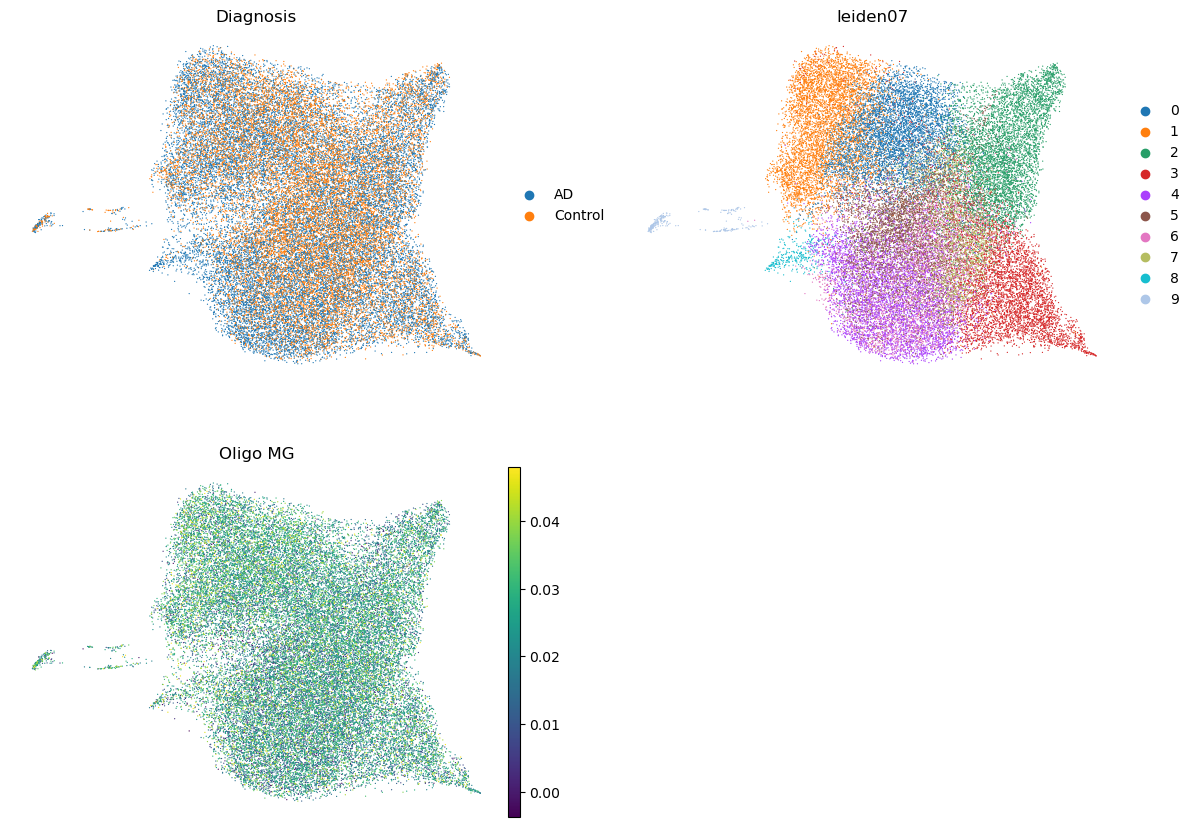

In [171]:
#Now check SCVI

sc.pl.umap(
    adata_scv,
    color=["Diagnosis", "leiden07", 'Oligo MG'],
    ncols=2,
    frameon=False,
    vmin = 'p1.5', vmax = 'p99'
)

/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/leuven/338/vsc33876/miniconda3/envs/python38/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


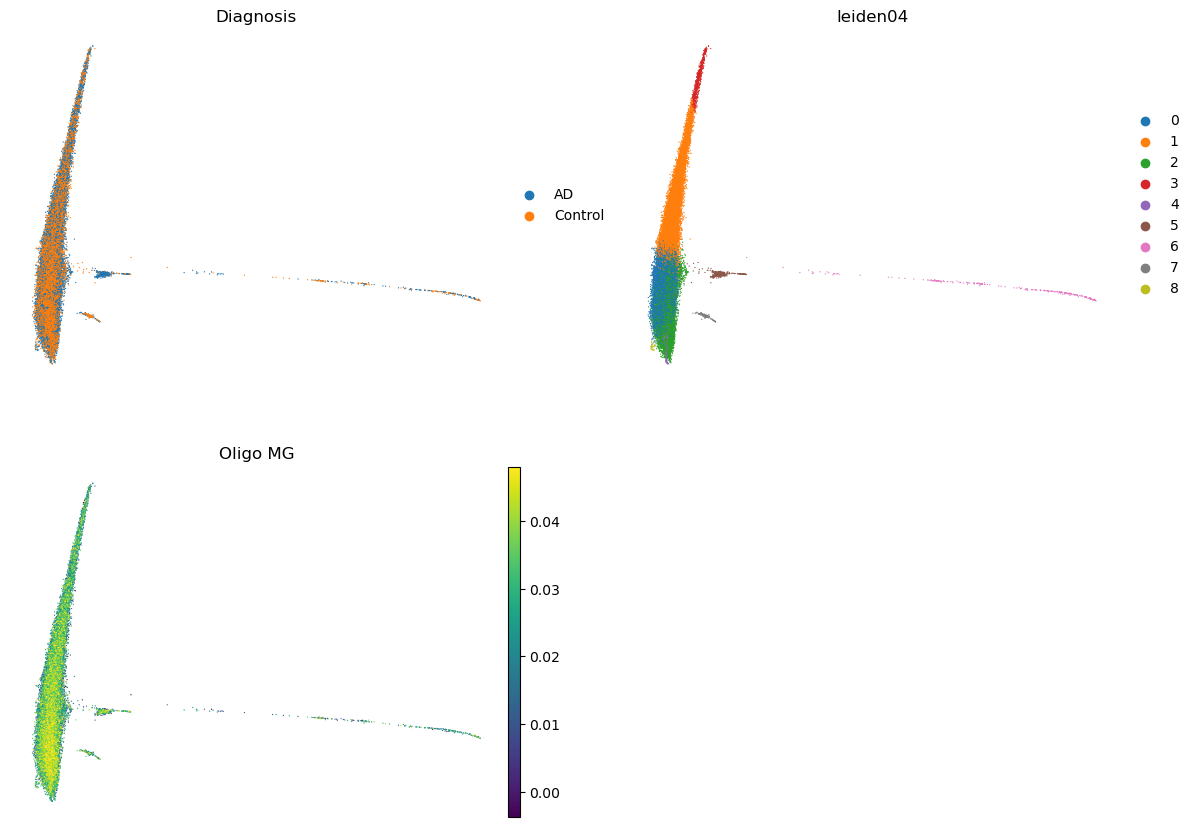

In [172]:
#Now check UMAP harmony

sc.pl.umap(
    adata_har,
    color=["Diagnosis", "leiden04", 'Oligo MG'],
    ncols=2,
    frameon=False,
    vmin = 'p1.5', vmax = 'p99'
)

### CSV file for other cell types and maybe other dataset??

In [153]:
#List all cell types. Most of them are inh or excitory

for col in allen.reindex(sorted(allen.columns), axis=1).columns:
    print(col)

Astro L1 FGFR3 SERPINI2
Astro L1-6 FGFR3 AQP1
Astro L1-6 FGFR3 PLCG1
Endo L2-5 NOSTRIN SRGN
Exc L2 LAMP5 KCNG3
Exc L2 LINC00507 ATP7B
Exc L2 LINC00507 GLRA3
Exc L2-3 LINC00507 DSG3
Exc L2-3 RORB CCDC68
Exc L2-3 RORB PTPN3
Exc L2-3 RORB RTKN2
Exc L3 LAMP5 CARM1P1
Exc L3 RORB OTOGL
Exc L3 THEMIS ENPEP
Exc L3-5 FEZF2 ASGR2
Exc L3-5 FEZF2 LINC01107
Exc L3-5 RORB LAMA4
Exc L3-5 RORB LINC01202
Exc L3-5 RORB LNX2
Exc L3-5 RORB RPRM
Exc L3-5 RORB TNNT2
Exc L5 FEZF2 CSN1S1
Exc L5 FEZF2 NREP-AS1
Exc L5 FEZF2 PKD2L1
Exc L5 FEZF2 RNF144A-AS1
Exc L5 RORB MED8
Exc L5 THEMIS FGF10
Exc L5 THEMIS LINC01116
Exc L5 THEMIS RGPD6
Exc L5 THEMIS SLC22A18
Exc L5 THEMIS VILL
Exc L5-6 FEZF2 C9orf135-AS1
Exc L5-6 FEZF2 CFTR
Exc L5-6 FEZF2 FILIP1L
Exc L5-6 FEZF2 IFNG-AS1
Exc L5-6 FEZF2 LPO
Exc L5-6 FEZF2 OR1L8
Exc L5-6 FEZF2 SH2D1B
Exc L5-6 THEMIS SMYD1
Exc L5-6 THEMIS TNFAIP6
Exc L6 FEZF2 FFAR4
Exc L6 FEZF2 KLK7
Exc L6 FEZF2 PDYN
Exc L6 FEZF2 POGK
Exc L6 FEZF2 PROKR2
Exc L6 THEMIS LINC00343
Exc L6 THEMIS SLN
Exc

In [173]:
#Second dataset

for col in allen2.reindex(sorted(allen2.columns), axis=1).columns:
    print(col)

Astro_1
Astro_2
Astro_3
Astro_4
Astro_5
Chandelier_1
Chandelier_2
Endo_1
Endo_2
Endo_3
L2.3.IT_1
L2.3.IT_10
L2.3.IT_12
L2.3.IT_13
L2.3.IT_2
L2.3.IT_3
L2.3.IT_5
L2.3.IT_6
L2.3.IT_7
L2.3.IT_8
L4.IT_1
L4.IT_2
L4.IT_3
L4.IT_4
L5.6.NP_1
L5.6.NP_2
L5.6.NP_3
L5.6.NP_4
L5.6.NP_6
L5.ET_1
L5.ET_2
L5.IT_1
L5.IT_2
L5.IT_3
L5.IT_5
L5.IT_6
L5.IT_7
L6.CT_1
L6.CT_2
L6.CT_3
L6.CT_4
L6.IT.Car3_1
L6.IT.Car3_2
L6.IT.Car3_3
L6.IT_1
L6.IT_2
L6b_1
L6b_2
L6b_3
L6b_4
L6b_5
L6b_6
Lamp5_1
Lamp5_2
Lamp5_3
Lamp5_4
Lamp5_5
Lamp5_6
Lamp5_Lhx6_1
Micro.PVM_1
Micro.PVM_2
OPC_1
OPC_2
Oligo_1
Oligo_2
Oligo_3
Oligo_4
Pax6_1
Pax6_2
Pax6_3
Pax6_4
Pvalb_1
Pvalb_10
Pvalb_12
Pvalb_13
Pvalb_14
Pvalb_15
Pvalb_2
Pvalb_3
Pvalb_5
Pvalb_6
Pvalb_7
Pvalb_8
Pvalb_9
Sncg_1
Sncg_2
Sncg_3
Sncg_4
Sncg_5
Sncg_6
Sncg_8
Sst.Chodl_1
Sst.Chodl_2
Sst_1
Sst_10
Sst_11
Sst_12
Sst_13
Sst_19
Sst_2
Sst_20
Sst_22
Sst_23
Sst_25
Sst_3
Sst_4
Sst_5
Sst_7
Sst_9
VLMC_1
VLMC_2
Vip_1
Vip_11
Vip_12
Vip_13
Vip_14
Vip_15
Vip_16
Vip_18
Vip_19
Vip_2
Vip_21
Vip_23
V

In [174]:
#Astro

filter_astro = [col for col in allen2 if col.startswith('Astro')]
filter_astro

['Astro_1', 'Astro_2', 'Astro_3', 'Astro_4', 'Astro_5']

In [175]:
filter_astro = allen2[['gene_symbol', 'Astro_1', 'Astro_2', 'Astro_3', 'Astro_4', 'Astro_5']]

maxvalue = filter_astro.max(axis=1)

filter_astro['Astro'] = maxvalue

filter_astro.drop(['Astro_1', 'Astro_2', 'Astro_3', 'Astro_4', 'Astro_5'], inplace=False, axis=1).loc[filter_astro['Astro'] > 0].sort_values("Astro", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/astro.csv', index=False)

/tmp/ipykernel_9556/4149058405.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_astro.max(axis=1)
/tmp/ipykernel_9556/4149058405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_astro['Astro'] = maxvalue


In [176]:
#Microglia

filter_micro= [col for col in allen2 if 'Micro' in col]
filter_micro

['Micro.PVM_1', 'Micro.PVM_2']

In [178]:
filter_micro = allen2[['gene_symbol', 'Micro.PVM_1', 'Micro.PVM_2']]

maxvalue = filter_micro.max(axis=1)

filter_micro['Micro'] = maxvalue

filter_micro.drop(['Micro.PVM_1', 'Micro.PVM_2'], inplace=False, axis=1).loc[filter_micro['Micro'] > 0].sort_values("Micro", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/micro.csv', index=False)

/tmp/ipykernel_9556/758720801.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_micro.max(axis=1)
/tmp/ipykernel_9556/758720801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_micro['Micro'] = maxvalue


In [179]:
#OPC

filter_opc = [col for col in allen2 if col.startswith('OP')]
filter_opc

['OPC_1', 'OPC_2']

In [180]:
filter_opc = allen2[['gene_symbol', 'OPC_1', 'OPC_2']]

maxvalue = filter_opc.max(axis=1)

filter_opc['OPC'] = maxvalue

filter_opc.drop(['OPC_1', 'OPC_2'], inplace=False, axis=1).loc[filter_opc['OPC'] > 0].sort_values("OPC", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/opc.csv', index=False)

/tmp/ipykernel_9556/3349095662.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_opc.max(axis=1)
/tmp/ipykernel_9556/3349095662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_opc['OPC'] = maxvalue


In [181]:
#VLMC

filter_VLMC= [col for col in allen2 if 'VLMC' in col]
filter_VLMC

['VLMC_1', 'VLMC_2']

In [182]:
filter_VLMC = allen2[['gene_symbol', 'VLMC_1', 'VLMC_2']]

maxvalue = filter_VLMC.max(axis=1)

filter_VLMC['VLMC'] = maxvalue

filter_VLMC.drop(['VLMC_1', 'VLMC_2'], inplace=False, axis=1).loc[filter_VLMC['VLMC'] > 0].sort_values("VLMC", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/vlmc.csv', index=False)

/tmp/ipykernel_9556/3134816289.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_VLMC.max(axis=1)
/tmp/ipykernel_9556/3134816289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_VLMC['VLMC'] = maxvalue


In [183]:
#Chandelier

filter_chan= [col for col in allen2 if 'Chandelier' in col]
filter_chan

['Chandelier_1', 'Chandelier_2']

In [184]:
filter_chan = allen2[['gene_symbol', 'Chandelier_1', 'Chandelier_2']]

maxvalue = filter_chan.max(axis=1)

filter_chan['Chandelier'] = maxvalue

filter_chan.drop(['Chandelier_1', 'Chandelier_2'], inplace=False, axis=1).loc[filter_chan['Chandelier'] > 0].sort_values("Chandelier", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/chan.csv', index=False)

/tmp/ipykernel_9556/3263062378.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_chan.max(axis=1)
/tmp/ipykernel_9556/3263062378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_chan['Chandelier'] = maxvalue


In [192]:
#L2

filter_l2= [col for col in allen2 if 'L2' in col]
filter_l2

['L2.3.IT_1',
 'L2.3.IT_2',
 'L2.3.IT_6',
 'L2.3.IT_7',
 'L2.3.IT_5',
 'L2.3.IT_13',
 'L2.3.IT_10',
 'L2.3.IT_8',
 'L2.3.IT_12',
 'L2.3.IT_3']

In [194]:
filter_l2 = allen2[['gene_symbol', 'L2.3.IT_1',
 'L2.3.IT_2',
 'L2.3.IT_6',
 'L2.3.IT_7',
 'L2.3.IT_5',
 'L2.3.IT_13',
 'L2.3.IT_10',
 'L2.3.IT_8',
 'L2.3.IT_12',
 'L2.3.IT_3']]

maxvalue = filter_l2.max(axis=1)

filter_l2['L2'] = maxvalue

filter_l2.drop(['L2.3.IT_1',
 'L2.3.IT_2',
 'L2.3.IT_6',
 'L2.3.IT_7',
 'L2.3.IT_5',
 'L2.3.IT_13',
 'L2.3.IT_10',
 'L2.3.IT_8',
 'L2.3.IT_12',
 'L2.3.IT_3'], inplace=False, axis=1).loc[filter_l2['L2'] > 0].sort_values("L2", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/l2.csv', index=False)

/tmp/ipykernel_9556/3679316675.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_l2.max(axis=1)
/tmp/ipykernel_9556/3679316675.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_l2['L2'] = maxvalue


In [196]:
#l4

filter_l4= [col for col in allen2 if 'L4' in col]
filter_l4

['L4.IT_2', 'L4.IT_3', 'L4.IT_4', 'L4.IT_1']

In [197]:
filter_l4 = allen2[['gene_symbol','L4.IT_2', 'L4.IT_3', 'L4.IT_4', 'L4.IT_1']]

maxvalue = filter_l4.max(axis=1)

filter_l4['L4'] = maxvalue

filter_l4.drop(['L4.IT_2', 'L4.IT_3', 'L4.IT_4', 'L4.IT_1'], inplace=False, axis=1).loc[filter_l4['L4'] > 0].sort_values("L4", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/l4.csv', index=False)

/tmp/ipykernel_9556/887157095.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_l4.max(axis=1)
/tmp/ipykernel_9556/887157095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_l4['L4'] = maxvalue


In [198]:
#L5

filter_l5= [col for col in allen2 if 'L5' in col]
filter_l5

['L5.IT_1',
 'L5.IT_3',
 'L5.IT_2',
 'L5.IT_5',
 'L5.IT_6',
 'L5.IT_7',
 'L5.ET_1',
 'L5.ET_2',
 'L5.6.NP_1',
 'L5.6.NP_2',
 'L5.6.NP_3',
 'L5.6.NP_6',
 'L5.6.NP_4']

In [202]:
filter_l5 = allen2[['gene_symbol','L5.IT_1',
 'L5.IT_3',
 'L5.IT_2',
 'L5.IT_5',
 'L5.IT_6',
 'L5.IT_7',
 'L5.ET_1',
 'L5.ET_2',
 'L5.6.NP_1',
 'L5.6.NP_2',
 'L5.6.NP_3',
 'L5.6.NP_6',
 'L5.6.NP_4']]

maxvalue = filter_l5.max(axis=1)

filter_l5['L5'] = maxvalue

filter_l5.drop(['L5.IT_1',
 'L5.IT_3',
 'L5.IT_2',
 'L5.IT_5',
 'L5.IT_6',
 'L5.IT_7',
 'L5.ET_1',
 'L5.ET_2',
 'L5.6.NP_1',
 'L5.6.NP_2',
 'L5.6.NP_3',
 'L5.6.NP_6',
 'L5.6.NP_4'], inplace=False, axis=1).loc[filter_l5['L5'] > 0].sort_values("L5", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/l5.csv', index=False)

/tmp/ipykernel_9556/2931269359.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_l5.max(axis=1)
/tmp/ipykernel_9556/2931269359.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_l5['L5'] = maxvalue


In [200]:
#L6

filter_l6= [col for col in allen2 if 'L6' in col]
filter_l6

['L6.IT_1',
 'L6.IT_2',
 'L6.CT_1',
 'L6.CT_2',
 'L6.CT_3',
 'L6.CT_4',
 'L6b_1',
 'L6b_2',
 'L6b_3',
 'L6b_4',
 'L6b_5',
 'L6b_6',
 'L6.IT.Car3_1',
 'L6.IT.Car3_2',
 'L6.IT.Car3_3']

In [201]:
filter_l6 = allen2[['gene_symbol','L6.IT_1',
 'L6.IT_2',
 'L6.CT_1',
 'L6.CT_2',
 'L6.CT_3',
 'L6.CT_4',
 'L6b_1',
 'L6b_2',
 'L6b_3',
 'L6b_4',
 'L6b_5',
 'L6b_6',
 'L6.IT.Car3_1',
 'L6.IT.Car3_2',
 'L6.IT.Car3_3']]

maxvalue = filter_l6.max(axis=1)

filter_l6['L6'] = maxvalue

filter_l6.drop(['L6.IT_1',
 'L6.IT_2',
 'L6.CT_1',
 'L6.CT_2',
 'L6.CT_3',
 'L6.CT_4',
 'L6b_1',
 'L6b_2',
 'L6b_3',
 'L6b_4',
 'L6b_5',
 'L6b_6',
 'L6.IT.Car3_1',
 'L6.IT.Car3_2',
 'L6.IT.Car3_3'], inplace=False, axis=1).loc[filter_l6['L6'] > 0].sort_values("L6", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/l6.csv', index=False)

/tmp/ipykernel_9556/3013062479.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_l6.max(axis=1)
/tmp/ipykernel_9556/3013062479.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_l6['L6'] = maxvalue


In [207]:
#Endothelial


filter_endo= [col for col in allen2 if 'End' in col]
filter_endo

['Endo_1', 'Endo_2', 'Endo_3']

In [208]:
filter_endo = allen2[['gene_symbol','Endo_1', 'Endo_2', 'Endo_3']]

maxvalue = filter_endo.max(axis=1)

filter_endo['Endo'] = maxvalue

filter_endo.drop(['Endo_1', 'Endo_2', 'Endo_3'], inplace=False, axis=1).loc[filter_endo['Endo'] > 0].sort_values("Endo", ascending = False)['gene_symbol'].to_csv('/vsc-hard-mounts/leuven-data/338/vsc33876/IBP_Stein_2022/Data/AllenMG/endo.csv', index=False)

/tmp/ipykernel_9556/1655721323.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxvalue = filter_endo.max(axis=1)
/tmp/ipykernel_9556/1655721323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_endo['Endo'] = maxvalue


# Now check all genes ranked with my dataset



In [6]:
oligo = pd.read_csv('./allenMG/oligo.csv')


In [7]:
oligo = pd.read_csv('./allenMG/oligo.csv')
astro  = pd.read_csv('./allenMG/astro.csv')
l5 = pd.read_csv('./allenMG/l5.csv')
l6 = pd.read_csv('./allenMG/l6.csv')
l2 = pd.read_csv('./allenMG/l2.csv')
chan = pd.read_csv('./allenMG/chan.csv')
vlmc = pd.read_csv('./allenMG/vlmc.csv')
opc = pd.read_csv('./allenMG/opc.csv')
micro = pd.read_csv('./allenMG/micro.csv')
endo = pd.read_csv('./allenMG/endo.csv')

In [8]:
#harmony
sc.tl.score_genes(adata_har, oligo['gene_symbol'], score_name='Oligo MG')
sc.tl.score_genes(adata_har, astro['gene_symbol'], score_name='astro MG')
sc.tl.score_genes(adata_har, l5['gene_symbol'], score_name='l5 MG')
sc.tl.score_genes(adata_har, l6['gene_symbol'], score_name='l6 MG')
sc.tl.score_genes(adata_har, l2['gene_symbol'], score_name='l2 MG')
sc.tl.score_genes(adata_har, chan['gene_symbol'], score_name='chandelier MG')
sc.tl.score_genes(adata_har, vlmc['gene_symbol'], score_name='vlmc MG')
sc.tl.score_genes(adata_har, opc['gene_symbol'], score_name='opc MG')
sc.tl.score_genes(adata_har, micro['gene_symbol'], score_name='micro MG')
sc.tl.score_genes(adata_har, endo['gene_symbol'], score_name='endo MG')



#SCVI
sc.tl.score_genes(adata_scv, oligo['gene_symbol'], score_name='Oligo MG')
sc.tl.score_genes(adata_scv, astro['gene_symbol'], score_name='astro MG')
sc.tl.score_genes(adata_scv, l5['gene_symbol'], score_name='l5 MG')
sc.tl.score_genes(adata_scv, l6['gene_symbol'], score_name='l6 MG')
sc.tl.score_genes(adata_scv, l2['gene_symbol'], score_name='l2 MG')
sc.tl.score_genes(adata_scv, chan['gene_symbol'], score_name='chandelier MG')
sc.tl.score_genes(adata_scv, vlmc['gene_symbol'], score_name='vlmc MG')
sc.tl.score_genes(adata_scv, opc['gene_symbol'], score_name='opc MG')
sc.tl.score_genes(adata_scv, micro['gene_symbol'], score_name='micro MG')
sc.tl.score_genes(adata_scv, endo['gene_symbol'], score_name='endo MG')


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/rucs/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [9]:
adata_har


AnnData object with n_obs × n_vars = 4626 × 5000
    obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'leiden1', 'leiden05', 'leiden01', 'leiden04', 'Oligo MG', 'astro MG', 'l5 MG', 'l6 MG', 'l2 MG', 'chandelier MG', 'vlmc MG', 'opc MG', 'micro MG', 'endo MG'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Diagnosis_colors', 'Sex_colors', 'cluster_colors', 'draw_graph', 'hvg', 'leiden', 'leiden01_colors', 'leiden04_colors', 'leiden05_colors', 'leiden1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

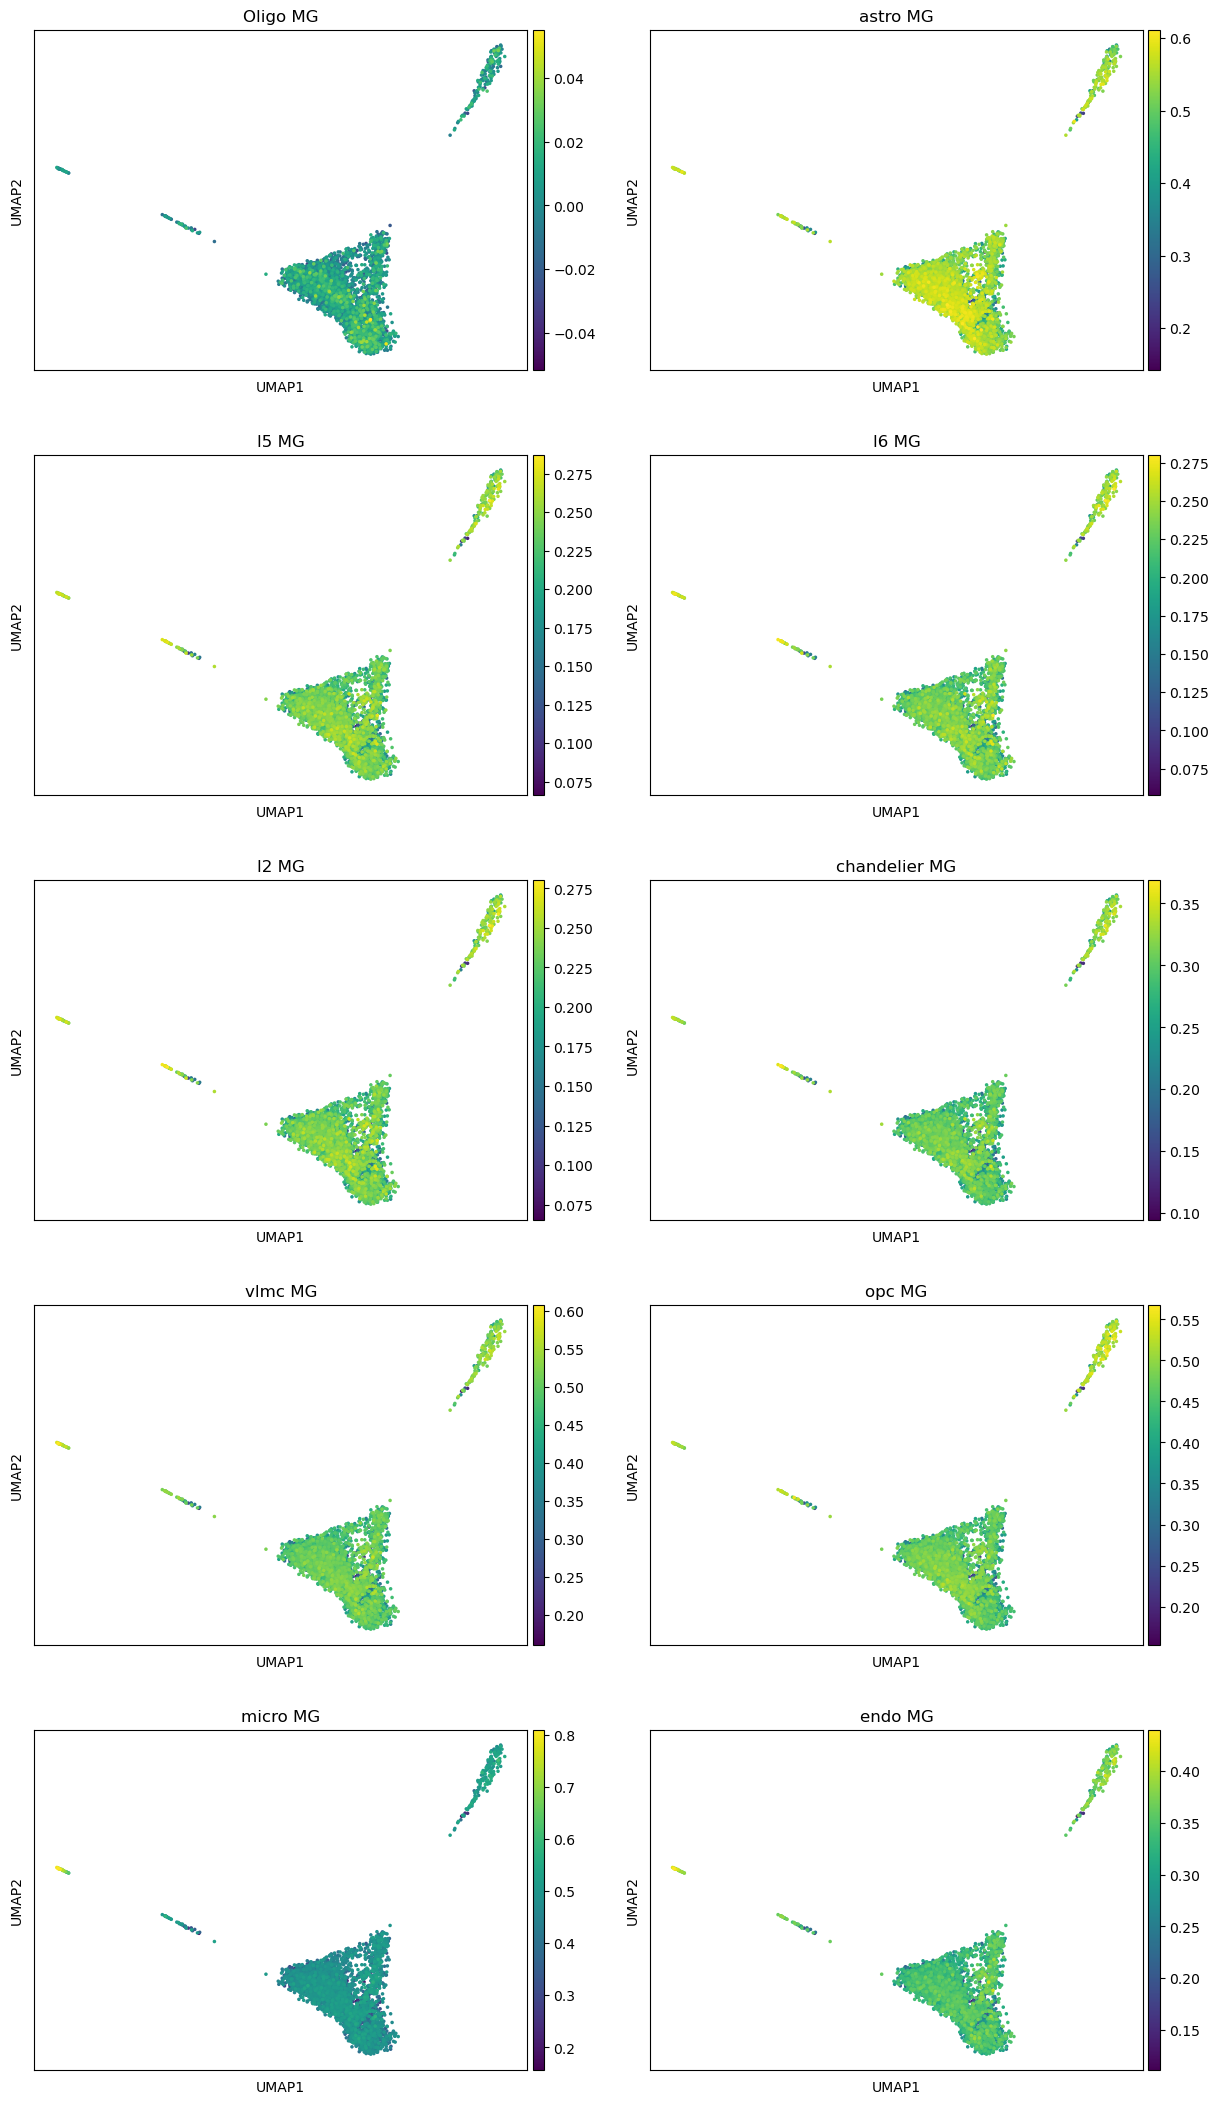

In [11]:
#Plot all and think if there was a mistake.

#Harmony 

sc.pl.umap(adata_har, color=[ 'Oligo MG', 'astro MG', 'l5 MG', 'l6 MG', 'l2 MG', 'chandelier MG', 'vlmc MG', 'opc MG', 'micro MG', 'endo MG'], 
           ncols = 2, 
           legend_loc = 'on data',
           frameon=True,
)

#           vmin = 'p1.5', vmax = 'p99'

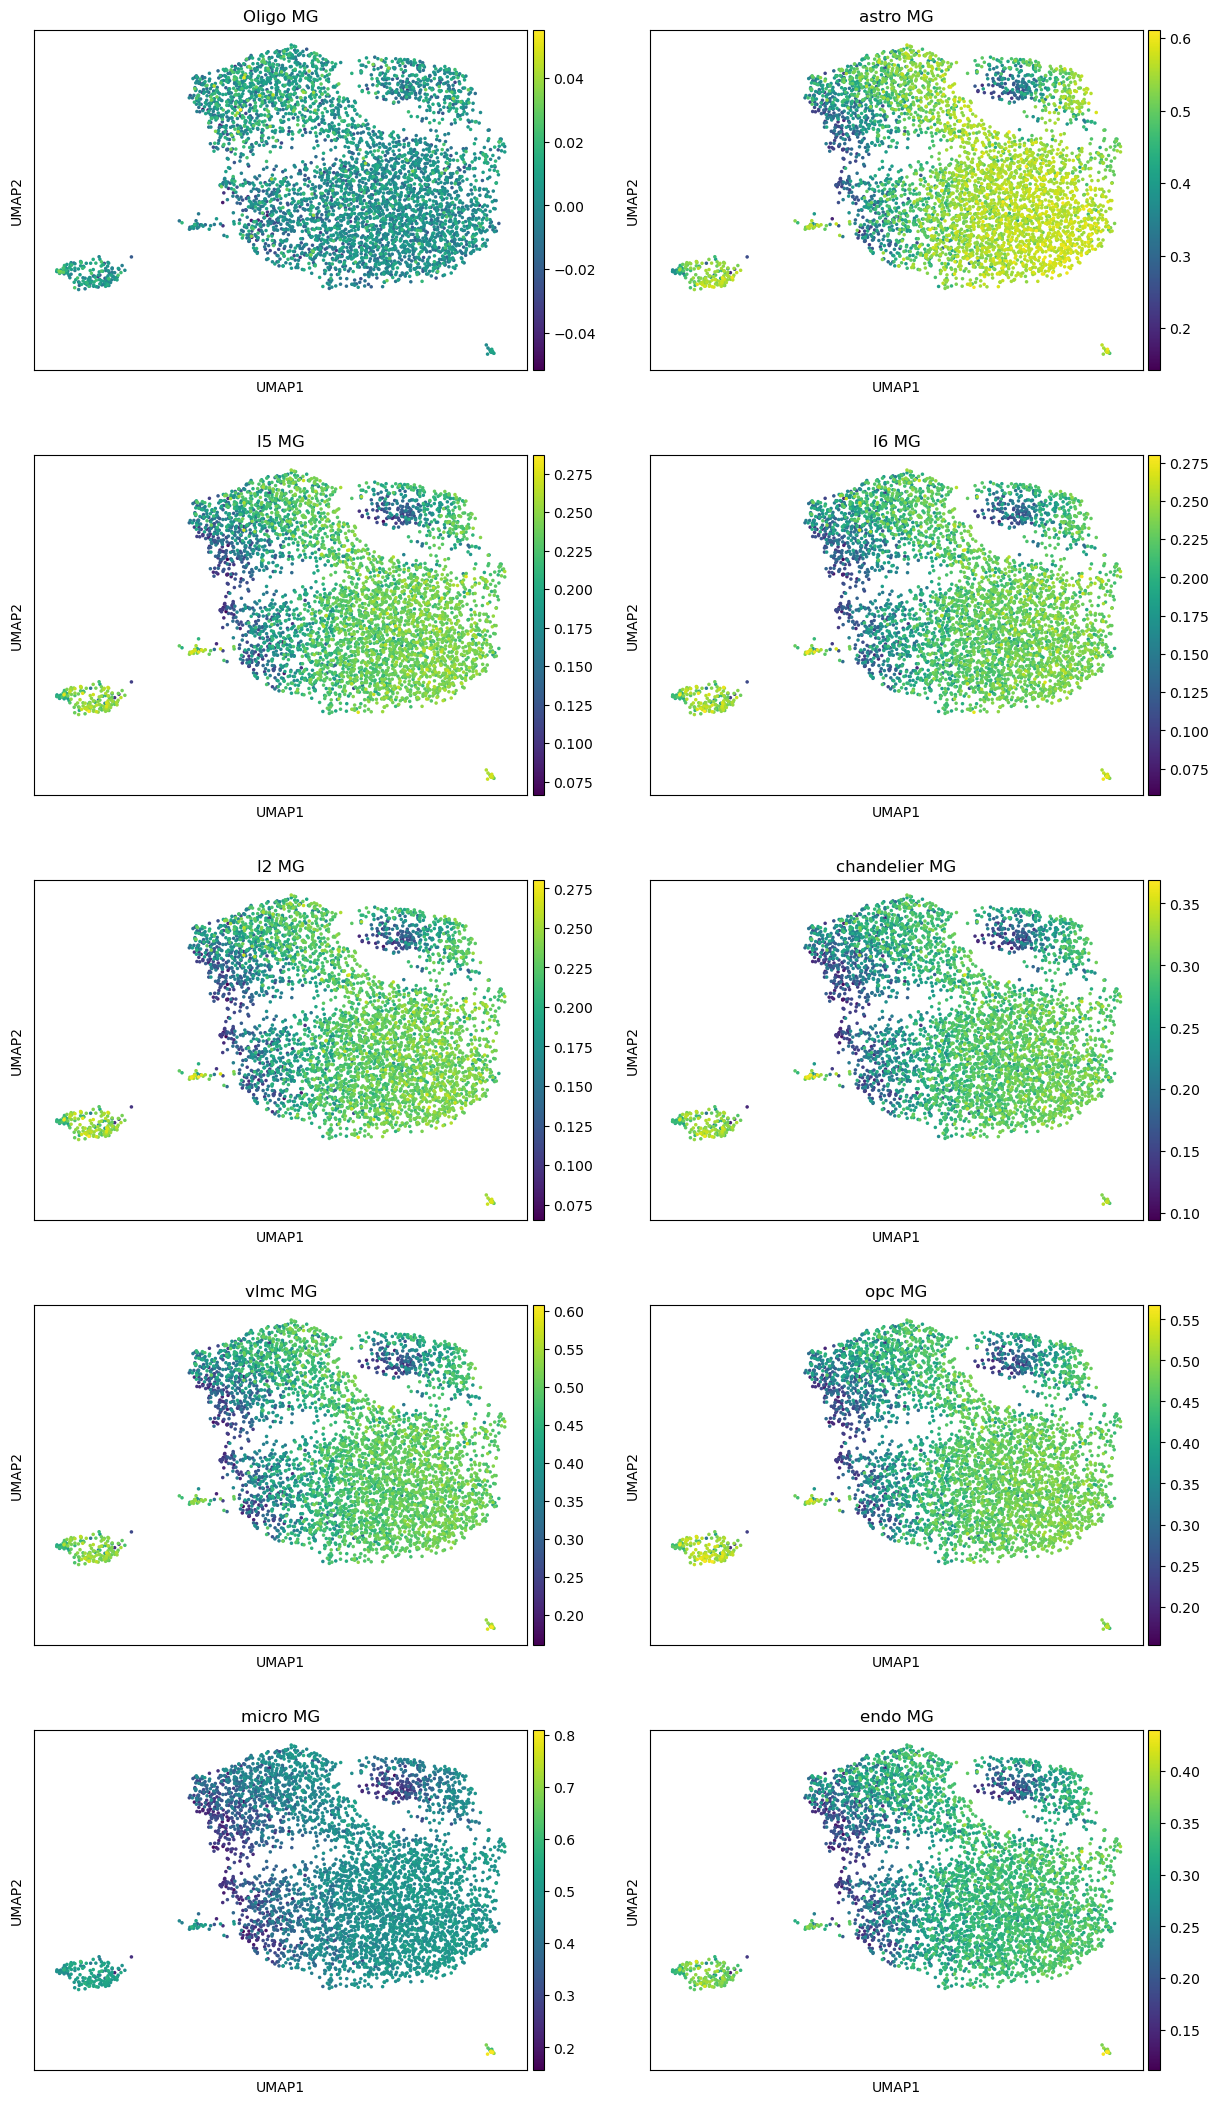

In [12]:
#SCVI

sc.pl.umap(adata_scv, color=[ 'Oligo MG', 'astro MG', 'l5 MG', 'l6 MG', 'l2 MG', 'chandelier MG', 'vlmc MG', 'opc MG', 'micro MG', 'endo MG'], 
           ncols = 2, 
           legend_loc = 'on data',
           frameon=True,
        
          )
#  vmin = 'p1.5', vmax = 'p99'